### PH464/564: Scientific Computing II
***J.S. Hazboun***

___

# Homework 1
### Due: Friday, Oct 4th at 11.59pm Pacific
---

## Handing in Homework

You had the opportunity to practice your git and GitHub skills by submitting HW0 via GitHub. You will need to repeat the process for every homework assigment gooing forward. Please make sure a copy of the completed assignment is placed in your private repos "work" directory and pushed to GitHub. Please label files _starting_ with the appropriate hw number. This week's will be `hw1_YOUR_NAME.ipynb`.

**WARNING for devcontainer users:** If you are using the **devcontainer** via `VSCode`, then you will want to make a separate working folder directly in your fork of the class repo and work on your assignment by either _copying_ a notebook in there or opening a new one in that folder. The reason is that the _repo_ has the devcontainer instructions and when you open `VSCode` it recognizes this and starts up the devcontainer.  

## Problem 1



Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1) If the first child is male, then the only unknown is the sex of the second child. We want the second child to be female, which has a probability of 0.5. Thus, $p(F,M |C_1=M) = 0.5$. 

2) $ p(F,F|C_1 OR C_2 =F) =0.3 $

3) $ p(F,F|C_1=F) = 0.5 $

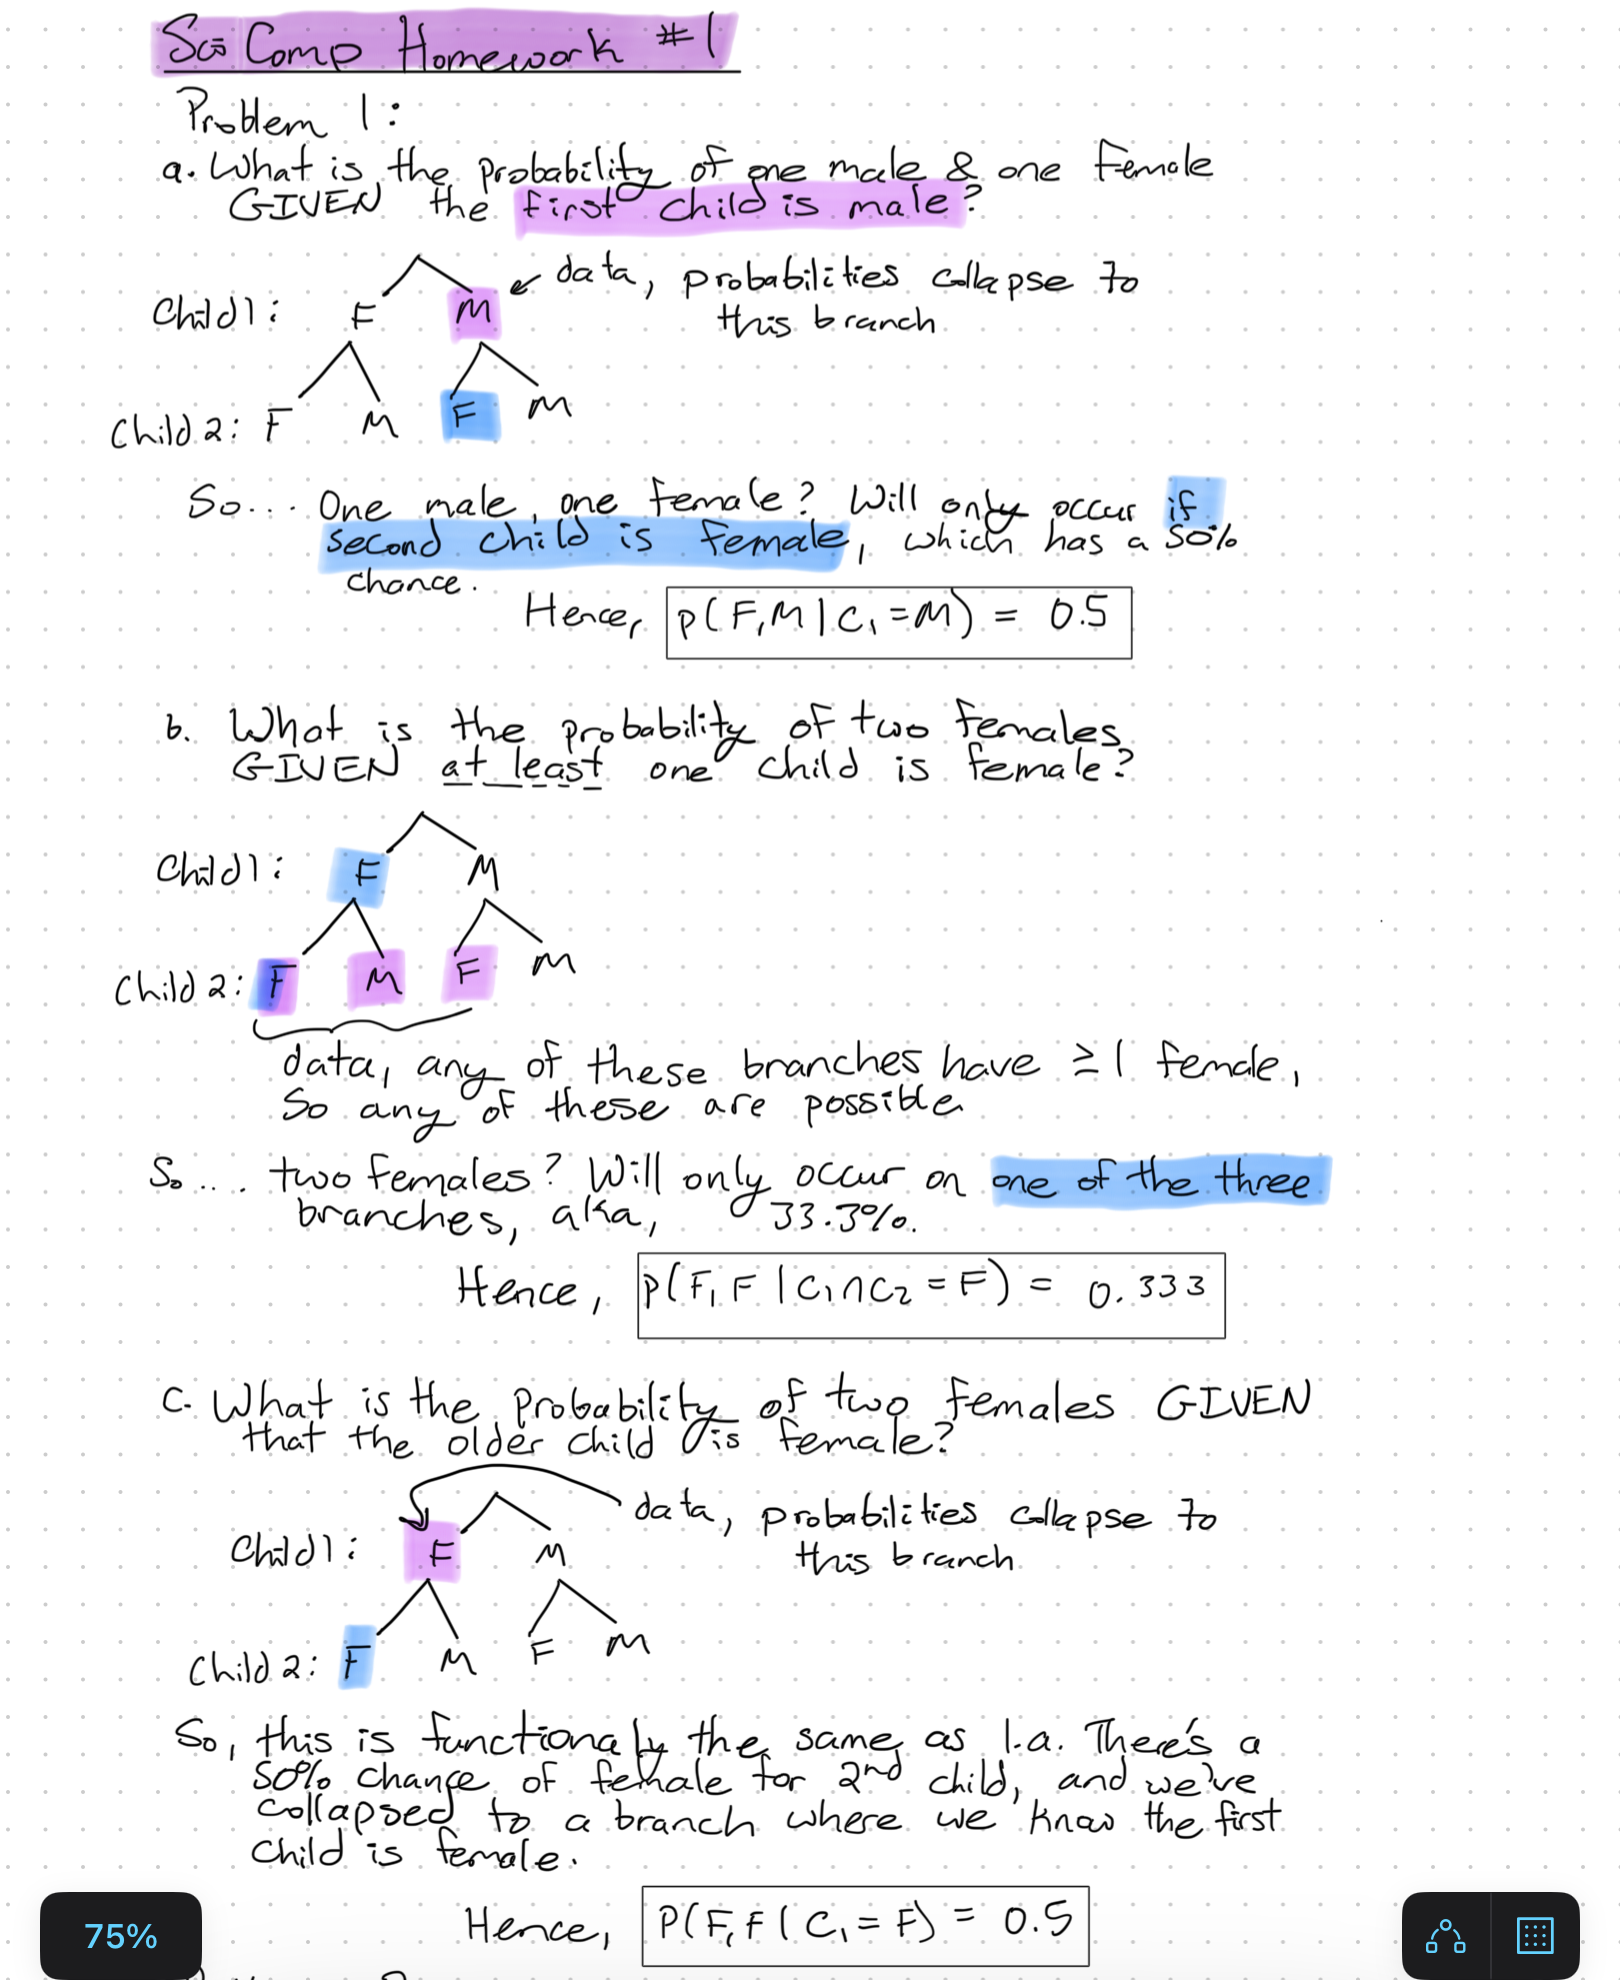

## Problem 2

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the base-10 log of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `Lecture_2`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.

### Solution

In [2]:
# All the classic imports!
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
import math

In [3]:
## Problem 2.a
x = np.random.uniform(0.1,10,1000) # calling numpy's built-in random sampler with the given parameters
print(x[0:10]) # printing the first 10 entries to check

[0.20096595 4.27392808 8.17130442 4.48454524 9.86759037 4.38438795
 0.63250955 8.54233657 8.37374243 2.07073307]


Text(0.5, 1.0, 'Histogram of Random Draws')

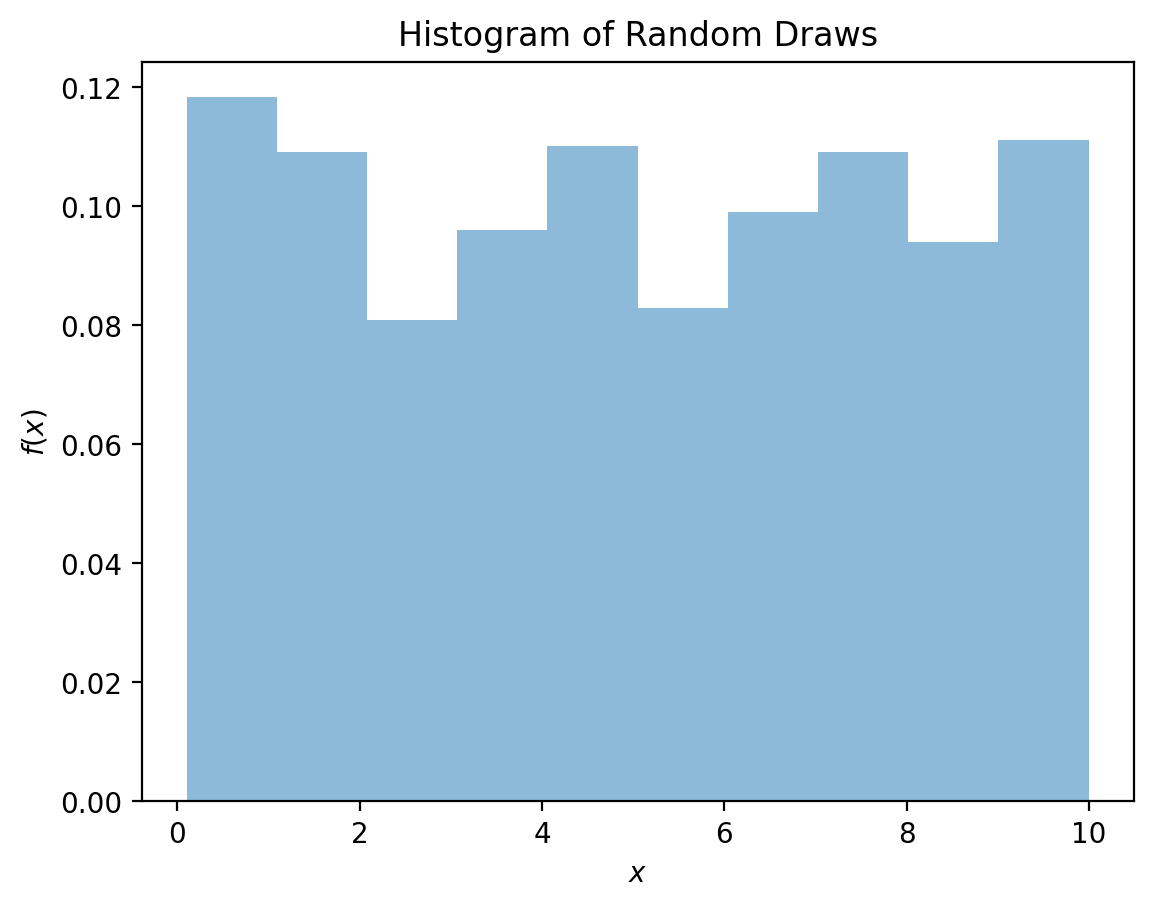

In [4]:
# Problem 2.b
plt.hist(x, bins=10, density=True, alpha=0.5); # changing bin size to 10 so "it looks more blocky", otherwise using Lec 3 settings
plt.xlabel('$x$'); # labelling our axes...
plt.ylabel('$f(x)$');
plt.title("Histogram of Random Draws")

In [5]:
## Problem 2.c
y = [] # make an empty list
for i in x: 
    y.append(math.log(i,10)) # iterate through the entries of our original list, taking the log by the builtin math function
print(y[0:10]) # print first 11 entries to check reasonableness

[-0.6968775301474636, 0.6308272097721968, 0.9122913903528834, 0.6517184099634569, 0.9942111123501142, 0.6419089752315376, -0.19893291365220894, 0.9315766785427829, 0.9229195980152457, 0.31612411946999946]


Text(0.5, 1.0, 'Histogram of LOG10 of Random Draws')

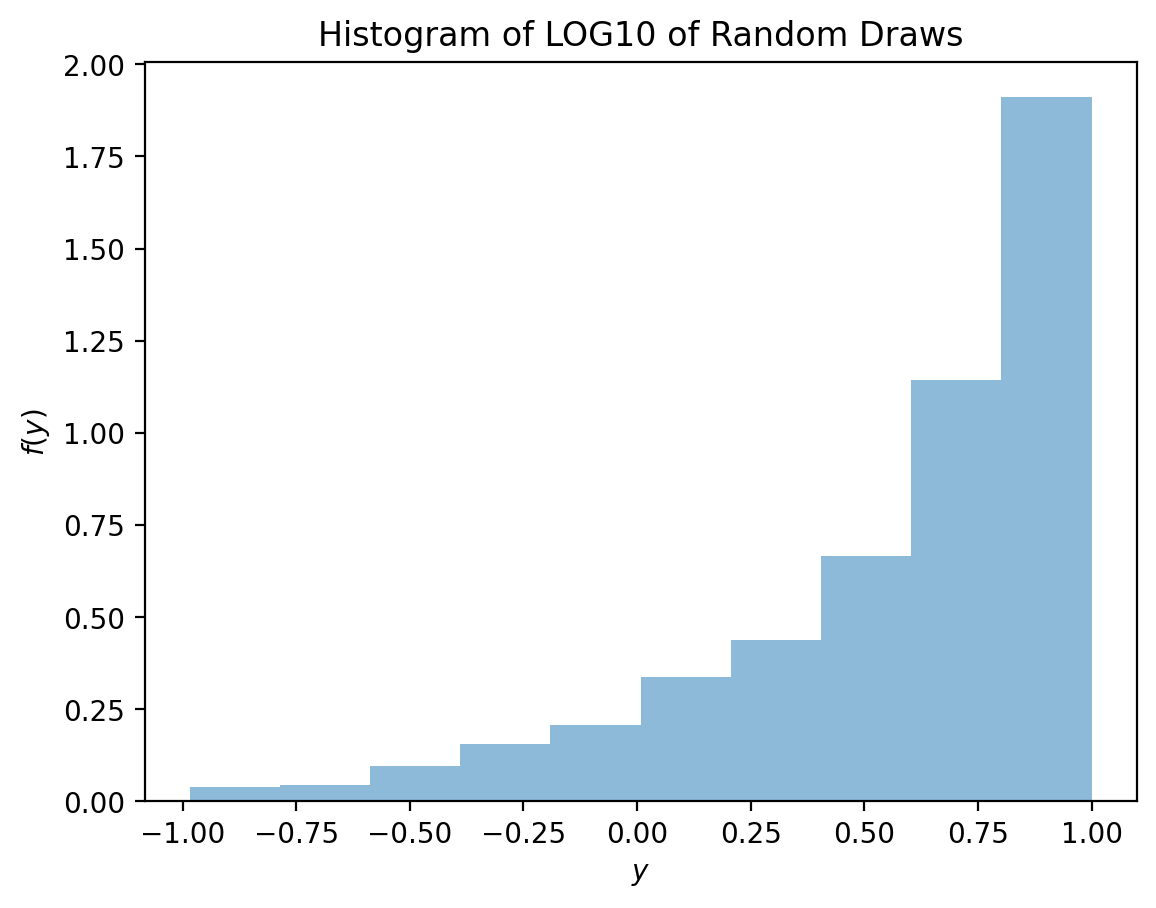

In [6]:
## Problem 2.d
plt.hist(y, bins=10, density=True, alpha=0.5); # Same settings as 2.b, but for y instead of x
plt.xlabel('$y$'); 
plt.ylabel('$f(y)$');
plt.title("Histogram of LOG10 of Random Draws")

We saw in Lecture 2 that the probability after transformation is 
$$\mathrm{Prob}(x, x+dx) = \mathrm{Prob}(y, y+dy)$$

$$p(x)dx = p(y)dy.$$ 

where $y = f(x)$.

Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x)$$
and we can use this final equation to calculate the theoretical probability of y.
We note that the total probability is 1/(10-0.1) = 0.101
$$ p(x) = 0.101 $$ 
(If we only draw from 0.1 to 10, we will get an x that lies in that same region. The sum of the area of the total region is 1)
$$ y = f(x) = log_{10}(x) = \frac{ln(x)}{ln(10)} $$
by changing the basis of our logarithm
$$ \frac{dx}{dy} = {\left|\frac{1}{xln(10)}\right|}^{-1} p(x) = x ln(10) = 10^yln(10) $$
after noting that 
$$ 10^{y(x)} = 10^{log_{10}(x)}=x $$
So, our theoretical function for y's probability is:
$$ p(y) = 0.1* 10^y ln(10) $$

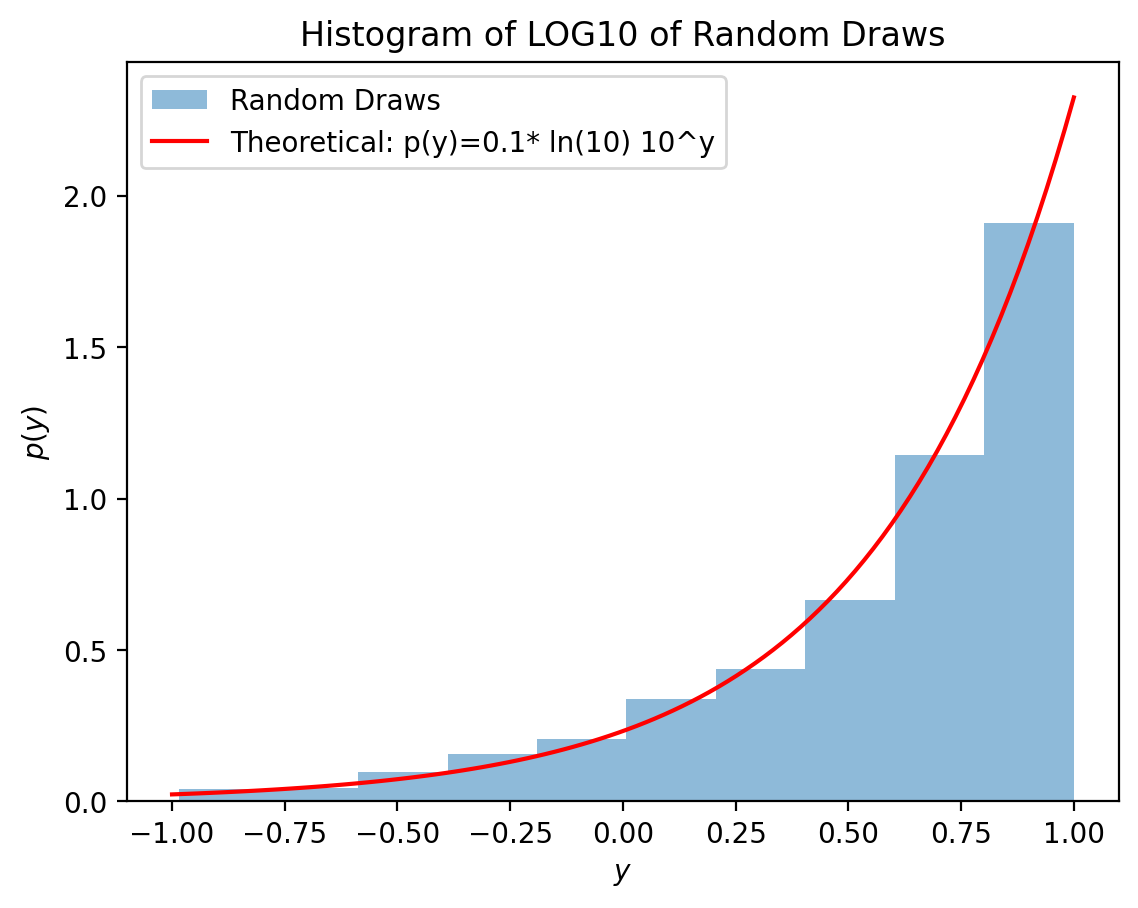

In [8]:
## Problem 2.d cont.
plt.hist(y, bins=10, density=True, alpha=0.5, label='Random Draws'); # Histogram of y
plt.xlabel('$y$'); 
plt.ylabel('$p(y)$');
plt.title("Histogram of LOG10 of Random Draws")

# Now adding the overlap of the theoretical function
# Define the function to overlay
def func(i):
    return .101 * 10**(i)*np.log(10) # normalization constant, times 10^y, times log(10)

# Generate x values for the function
i = np.linspace(-1, 1, 100) # choose the same region as the Histogram, but evenly spaced samples

# Plot the function
plt.plot(i, func(i), 'r', label='Theoretical: p(y)=0.1* ln(10) 10^y')
plt.legend()
plt.show()

In [12]:
## 2.e
xmean = np.mean(x) # simply use the built-in numpy functions for mean and median
ymean = np.mean(y) # though we'll need to convert the mean by taking 10^(ymean) since y is a function of x
xmedian = np.median(x)
ymedian = np.median(y) # and we do the same for the median

print("The mean of x is ", round(xmean,3), ",while the mean of y is ", round(10**(ymean),3))
print("The median of x is ", round(xmedian,3), ",while the mean of y is ", round(10**(ymedian),3))

The mean of x is  5.031 ,while the mean of y is  3.738
The median of x is  4.982 ,while the mean of y is  4.982


As expected, the scaling of y changes the average, which is biased by outliers, but does NOT change the orderring, so the median remains constant.

## Problem 3

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. 

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian Python object from part (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

In [13]:
## 3.a - the location is centerred at the mean for a gaussian, which we can make with scipy.stats.norm (norm = Gaussian)
distG = scipy.stats.norm(loc=100,scale=15) # Here, the mu is 100, and the scale is the std of 15.
draws = distG.rvs(size=10) # 10 random draws
p = distG.pdf(x=145) # pdf evaluated at x=145

print(draws)
print(p)

[ 79.63740728  96.1352523   56.57342353  90.33662452  96.67238266
 101.79013869  90.46788603  94.49085764 100.07191988  97.12415549]
0.0002954565607958672


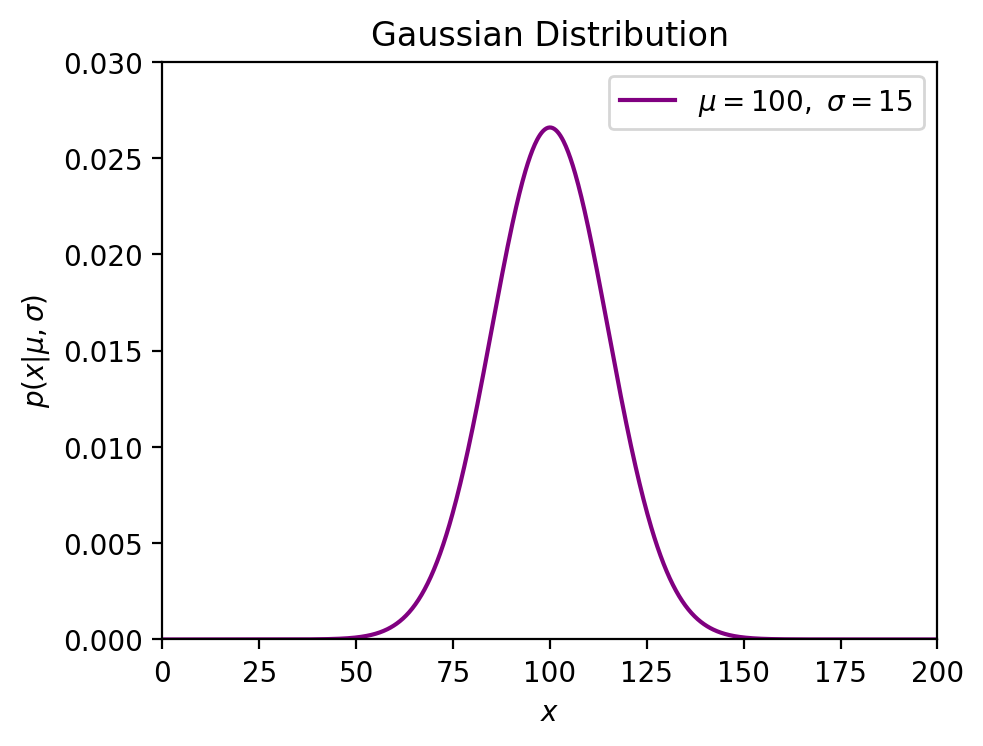

In [16]:
# Referrencing Lecture 3...
xgrid = np.linspace(0,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, gaussPDF, ls='-', c='purple', 
         label=f'$\mu={100},\ \sigma={15}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

(Continuing from Lecture 3...)
The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x'} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

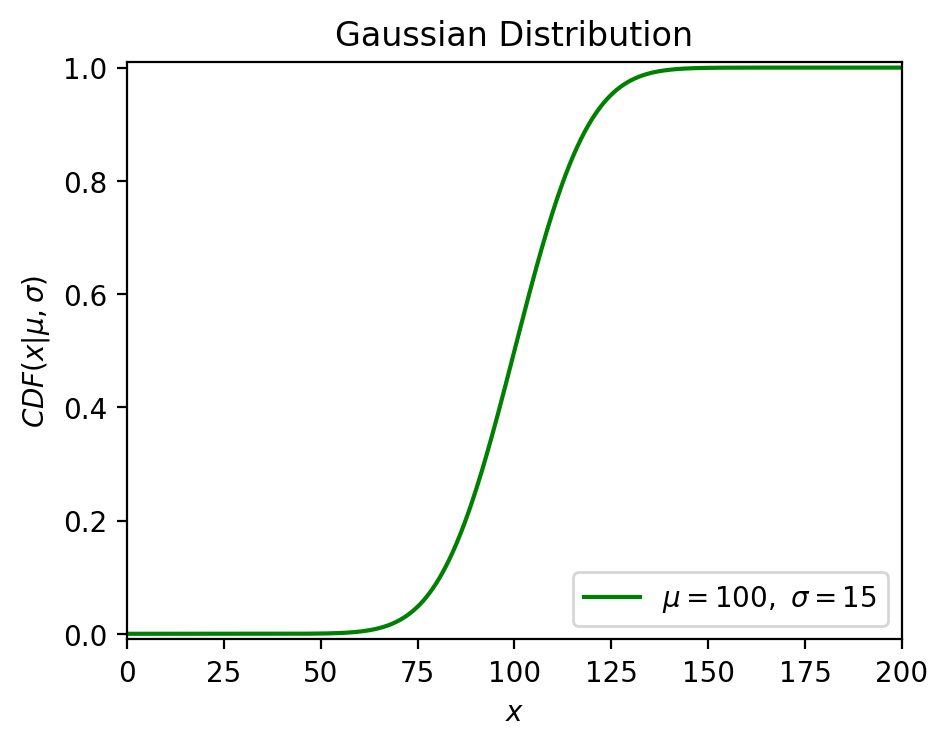

In [18]:
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='green', 
         label=r'$\mu=%i,\ \sigma=%i$' % (100, 15))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

### 3.c 
We could estimate this by drawing a vertical line at x=145, and then a horizontal line to the y-axis from where we crossed our function. Looks like we're about 1% of the population or less. Or, a simple calculation using .cdf can make this precise: the fraction of the population ABOVE 145 is simply 1 - the cdf AT 145. 

In [24]:
c = distG.cdf(x=145) # cdf evaluated at x=145. 1 minus this yields the desired fraction of the population
print(round((1-c)*100,2), "% percent of the population have an IQ > 145.") # multiply by 100 to convert to percent.

0.13 % percent of the population have an IQ > 145.


In [26]:
# Oh! Or we could've used the Survival function to avoid subtracting by 1.
print(round(distG.sf(x=145)*100,2))

0.13


In [28]:
# 3.d And, it looks like the INVERSE Survival Function does the opposite calculation. So, if we were looking for 
# the IQ that only .13% of the population has, we could confirm that this is 145.
print(distG.isf(0.0013))

145.17180637749675


In [35]:
# The IQ of "1 in a million" is $\frac{1}{10^6}$
print("The IQ cut-off for '1 in a million' is ", round(distG.isf(1/(10e5)),1))

The IQ cut-off for '1 in a million' is  171.3
